In [2]:
from matplotlib import pyplot as plt
import pandas as pd
from collections import Counter
import seaborn as sns
import numpy as np

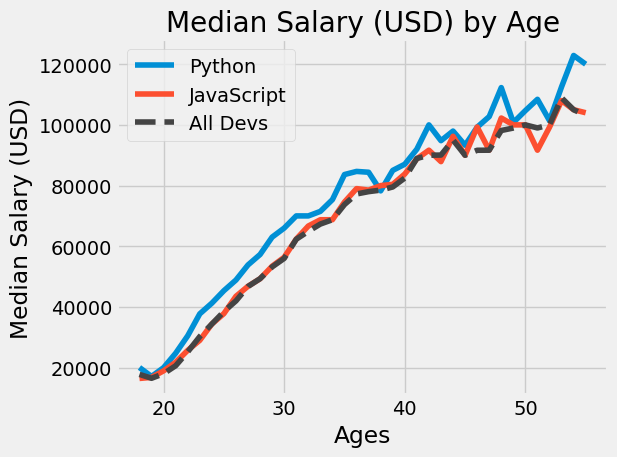

In [9]:

ages_x = [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
          36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]

py_dev_y = [20046, 17100, 20000, 24744, 30500, 37732, 41247, 45372, 48876, 53850, 57287, 63016, 65998, 70003, 70000, 71496, 75370, 83640, 84666,
            84392, 78254, 85000, 87038, 91991, 100000, 94796, 97962, 93302, 99240, 102736, 112285, 100771, 104708, 108423, 101407, 112542, 122870, 120000]
plt.plot(ages_x, py_dev_y, label='Python')

js_dev_y = [16446, 16791, 18942, 21780, 25704, 29000, 34372, 37810, 43515, 46823, 49293, 53437, 56373, 62375, 66674, 68745, 68746, 74583, 79000,
            78508, 79996, 80403, 83820, 88833, 91660, 87892, 96243, 90000, 99313, 91660, 102264, 100000, 100000, 91660, 99240, 108000, 105000, 104000]
plt.plot(ages_x, js_dev_y, label='JavaScript')

dev_y = [17784, 16500, 18012, 20628, 25206, 30252, 34368, 38496, 42000, 46752, 49320, 53200, 56000, 62316, 64928, 67317, 68748, 73752, 77232,
         78000, 78508, 79536, 82488, 88935, 90000, 90056, 95000, 90000, 91633, 91660, 98150, 98964, 100000, 98988, 100000, 108923, 105000, 103117]
plt.plot(ages_x, dev_y, color='#444444', linestyle='--', label='All Devs')

plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.title('Median Salary (USD) by Age')

plt.legend()

plt.tight_layout()

plt.savefig('plot.png')

plt.show()

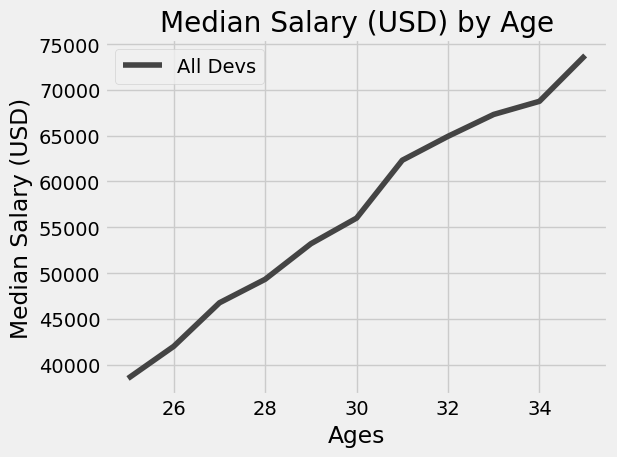

In [10]:

# plt.style.use("fivethirtyeight")

ages_x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

dev_y = [38496, 42000, 46752, 49320, 53200,
         56000, 62316, 64928, 67317, 68748, 73752]
plt.plot(ages_x, dev_y, color="#444444", label="All Devs")

# py_dev_y = [45372, 48876, 53850, 57287, 63016,
#             65998, 70003, 70000, 71496, 75370, 83640]
# plt.plot(ages_x, py_dev_y, color="#008fd5", label="Python")

# js_dev_y = [37810, 43515, 46823, 49293, 53437,
#             56373, 62375, 66674, 68745, 68746, 74583]
# plt.plot(ages_x, js_dev_y, color="#e5ae38", label="JavaScript")

plt.legend()

plt.title("Median Salary (USD) by Age")
plt.xlabel("Ages")
plt.ylabel("Median Salary (USD)")

plt.tight_layout()

plt.show()

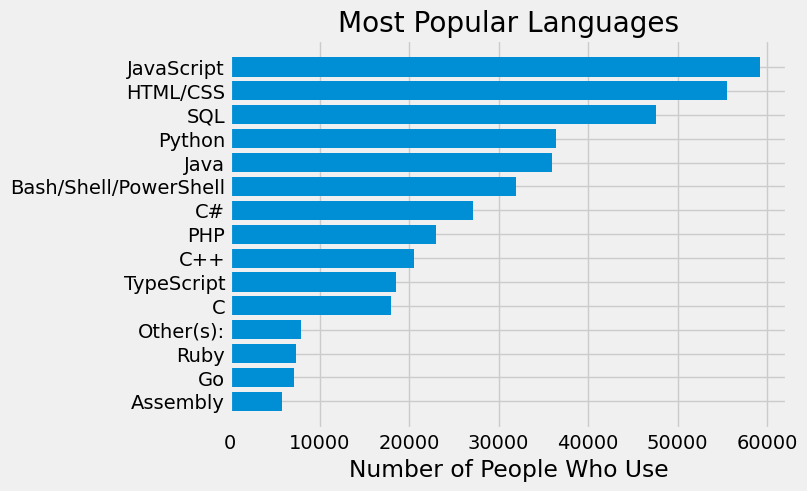

In [11]:

plt.style.use("fivethirtyeight")

data = pd.read_csv('data.csv')
ids = data['Responder_id']
lang_responses = data['LanguagesWorkedWith']

language_counter = Counter()

for response in lang_responses:
    language_counter.update(response.split(';'))

languages = []
popularity = []

for item in language_counter.most_common(15):
    languages.append(item[0])
    popularity.append(item[1])

languages.reverse()
popularity.reverse()

plt.barh(languages, popularity)

plt.title("Most Popular Languages")
# plt.ylabel("Programming Languages")
plt.xlabel("Number of People Who Use")

# plt.tight_layout()

plt.show()

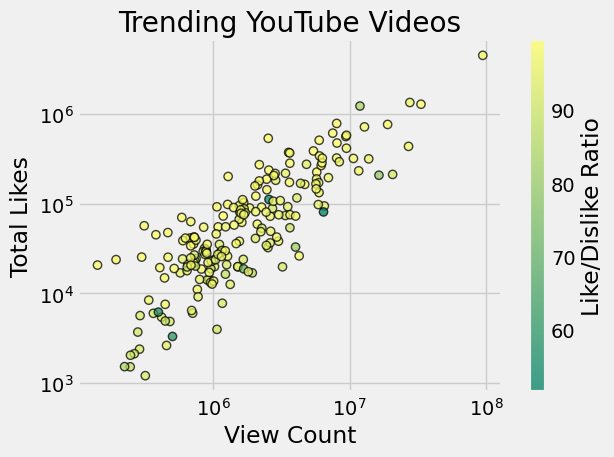

In [12]:
# plt.style.use('seaborn')

data = pd.read_csv('2019-05-31-data.csv')
view_count = data['view_count']
likes = data['likes']
ratio = data['ratio']

plt.scatter(view_count, likes, c=ratio, cmap='summer',
            edgecolor='black', linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('Like/Dislike Ratio')

plt.xscale('log')
plt.yscale('log')

plt.title('Trending YouTube Videos')
plt.xlabel('View Count')
plt.ylabel('Total Likes')

plt.tight_layout()

plt.show()

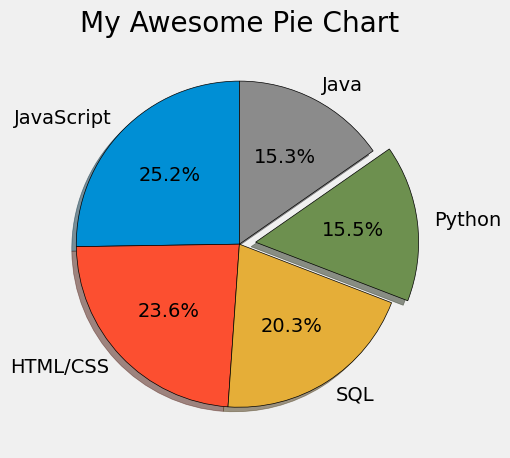

In [13]:
slices = [59219, 55466, 47544, 36443, 35917]
labels = ['JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java']
explode = [0, 0, 0, 0.1, 0]

plt.pie(slices, labels=labels, explode=explode, shadow=True,
        startangle=90, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

plt.title("My Awesome Pie Chart")
plt.tight_layout()
plt.show()

/var/folders/f_/wkybt9v97ngbfv60cnl6mzg80000gn/T/ipykernel_7045/1332747783.py:6: DtypeWarning: Columns (3,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Pakistan_Largest_Ecommerce_Dataset.csv', usecols=["sku","price","qty_ordered","grand_total", "category_name_1", "created_at"], parse_dates=["created_at"])


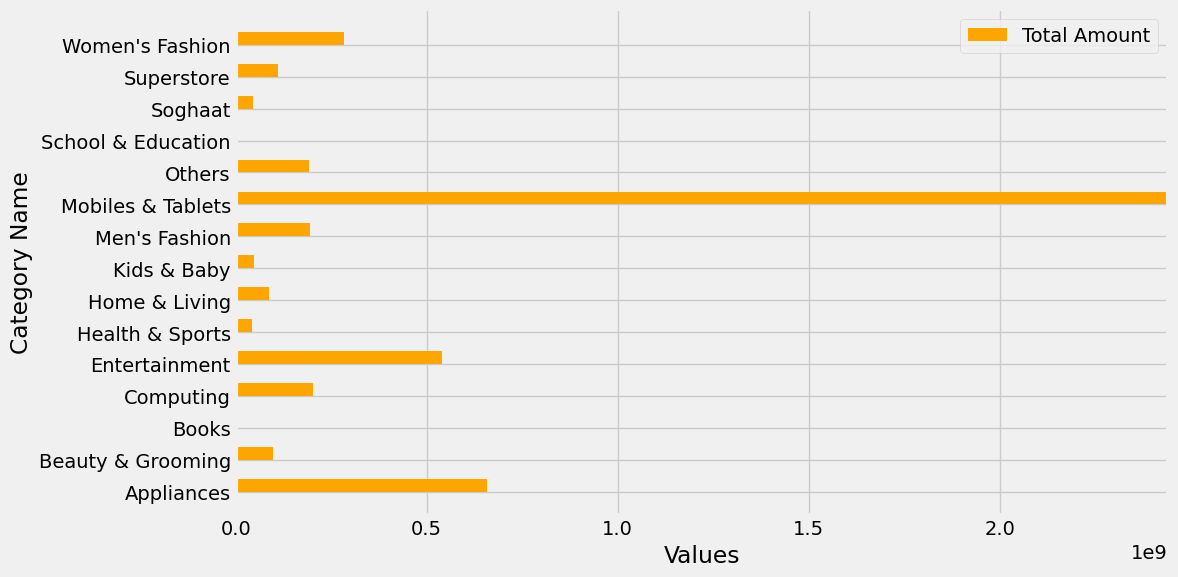

In [166]:
# data from https://allisonhorst.github.io/palmerpenguins/
# 
# import matplotlib.pyplot as plt
# import numpy as np

data = pd.read_csv('Pakistan_Largest_Ecommerce_Dataset.csv', usecols=["sku","price","qty_ordered","grand_total", "category_name_1", "created_at"], parse_dates=["created_at"])


filtered_data = data[data['category_name_1'] != '\\N']

grouped_data = filtered_data.groupby('category_name_1').agg({'qty_ordered': 'sum', 'grand_total': 'sum'}).reset_index()

fig, ax = plt.subplots(figsize=(12, 6))

width = 0.4
y = range(len(grouped_data['category_name_1'].unique()))
ax.barh([pos + width for pos in y], grouped_data['grand_total'], height=width, label='Total Amount', color='orange')

# Set Y-axis ticks and labels
ax.set_yticks([pos + width / 2 for pos in y])
ax.set_yticklabels(grouped_data['category_name_1'].unique())
ax.set_ylabel('Category Name')

# Set X-axis label
ax.set_xlabel('Values')
ax.set_xlim(0, max(grouped_data['grand_total']) + 1000)

# Add legend
ax.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

/var/folders/f_/wkybt9v97ngbfv60cnl6mzg80000gn/T/ipykernel_7045/4176418056.py:1: DtypeWarning: Columns (3,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Pakistan_Largest_Ecommerce_Dataset.csv', usecols=["sku","price","qty_ordered","grand_total", "category_name_1", "created_at"], parse_dates=["created_at"])


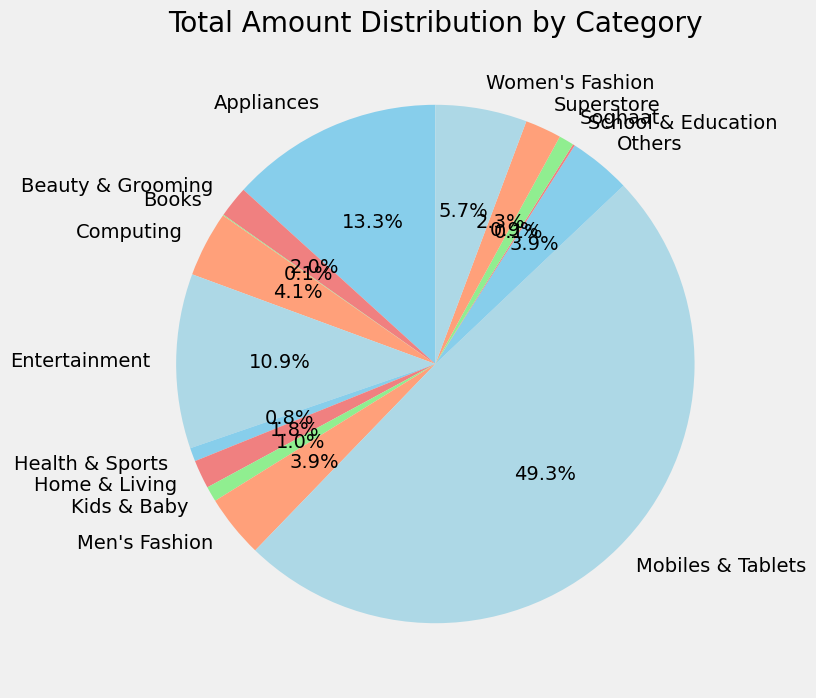

In [167]:
data = pd.read_csv('Pakistan_Largest_Ecommerce_Dataset.csv', usecols=["sku","price","qty_ordered","grand_total", "category_name_1", "created_at"], parse_dates=["created_at"])

filtered_data = data[data['category_name_1'] != '\\N']

grouped_data = filtered_data.groupby('category_name_1').agg({'qty_ordered': 'sum', 'grand_total': 'sum'}).reset_index()

fig, ax = plt.subplots(figsize=(8, 8))

# Create a pie chart for 'grand_total'
ax.pie(grouped_data['grand_total'], labels=grouped_data['category_name_1'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightblue'])

# Set the title
ax.set_title('Total Amount Distribution by Category')

# Show the plot
plt.show()

/var/folders/f_/wkybt9v97ngbfv60cnl6mzg80000gn/T/ipykernel_56550/2301815033.py:1: DtypeWarning: Columns (3,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Pakistan_Largest_Ecommerce_Dataset.csv', usecols=["sku","price","qty_ordered","grand_total", "category_name_1", "created_at"], parse_dates=["created_at"])


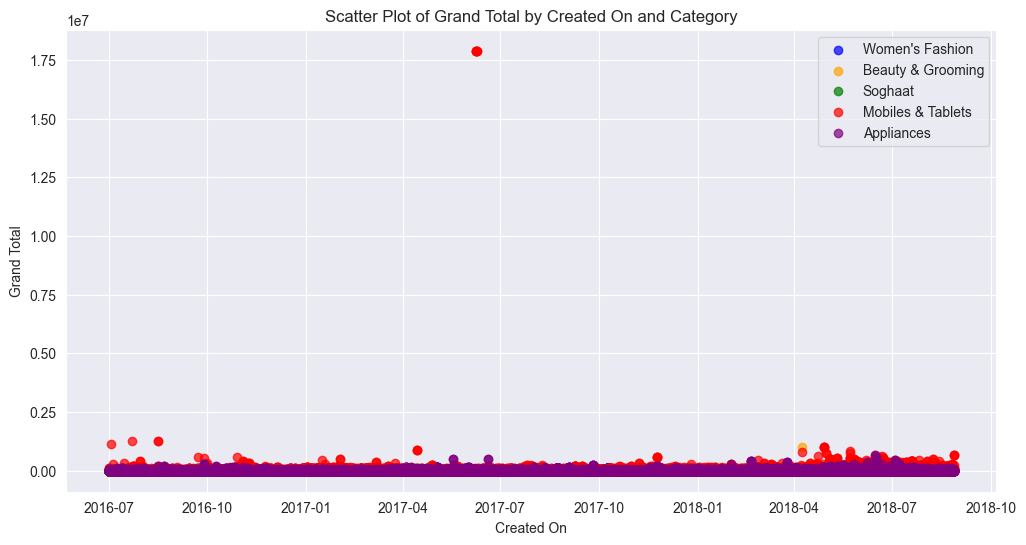

In [4]:

data = pd.read_csv('Pakistan_Largest_Ecommerce_Dataset.csv', usecols=["sku","price","qty_ordered","grand_total", "category_name_1", "created_at"], parse_dates=["created_at"])

filtered_data = data[data['category_name_1'] != '\\N']

# Create a scatter plot with color-coded categories
plt.figure(figsize=(12, 6))
for category, color in zip(filtered_data['category_name_1'].unique(), ['blue', 'orange', 'green', 'red', 'purple']):
    category_data = filtered_data[filtered_data['category_name_1'] == category]
    plt.scatter(category_data['created_at'], category_data['grand_total'], label=category, color=color, alpha=0.7)

# Set labels and title
plt.xlabel('Created On')
plt.ylabel('Grand Total')
plt.title('Scatter Plot of Grand Total by Created On and Category')
plt.legend()

# Show the plot
plt.show()

/var/folders/f_/wkybt9v97ngbfv60cnl6mzg80000gn/T/ipykernel_56550/2828627884.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_data, x='grand_total', palette='bright')


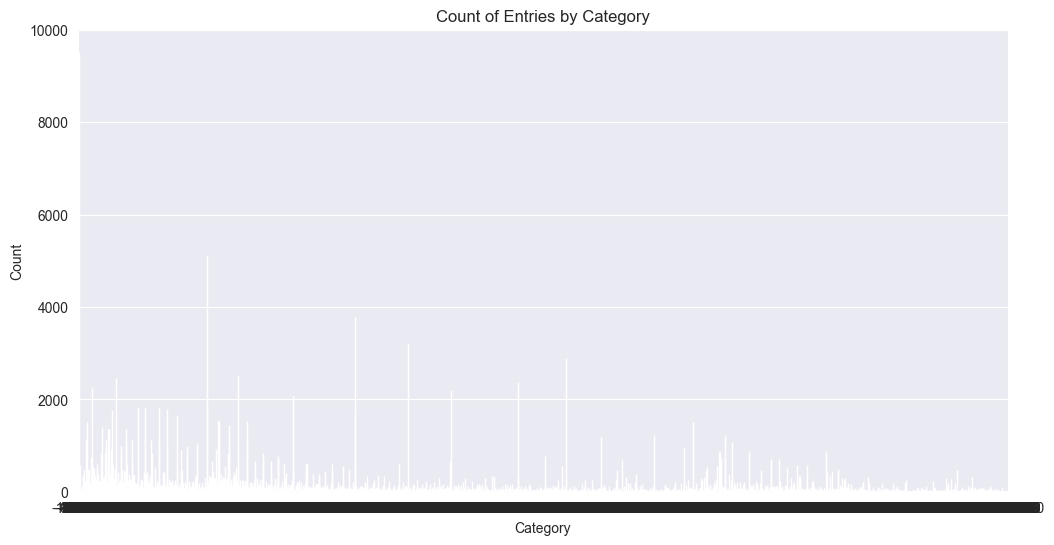

In [9]:
# Create a histogram with 'grand_total' categorized by 'category_name_1'
# plt.figure(figsize=(12, 6))
# sns.histplot(data=filtered_data, x='grand_total', hue='category_name_1', multiple='stack', palette='bright', bins=20)

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_data, x='grand_total', palette='bright')

# Set labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Entries by Category')

# Show the plot
plt.show()